IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      20.0 -0.064380   0.010715    0.831188   0.121782          0.0   
1      10.0 -0.020886   0.009800    2.521520   0.101042         54.0   
2      60.0 -0.065545   0.011395    0.524066   0.125153          0.0   
3      46.0 -0.011309   0.011933    2.133498   0.109684         61.0   
4      59.0 -0.065511   0.011422    0.515395   0.125244          0.0   
...     ...       ...        ...         ...        ...          ...   
1344   50.0 -0.043329   0.025471    1.734129   0.165180         91.0   
1345   80.0 -0.053349   0.025616   -0.914019   0.168530          0.0   
1346    4.0  0.030339   0.048316    3.182989   0.221586         63.0   
1347   20.0 -0.026444   0.018310    4.187434   0.137695          0.0   
1348   49.0 -0.069449   0.010436    0.915157   0.123422          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            78.0   12.192520    3.096314  0.021076  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.064380   0.010715    0.831188   0.121782          0.0         78.0   
1    -0.020886   0.009800    2.521520   0.101042         54.0         74.0   
2    -0.065545   0.011395    0.524066   0.125153          0.0         81.0   
3    -0.011309   0.011933    2.133498   0.109684         61.0         60.0   
4    -0.065511   0.011422    0.515395   0.125244          0.0         89.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.043329   0.025471    1.734129   0.165180         91.0          0.0   
1345 -0.053349   0.025616   -0.914019   0.168530          0.0         90.0   
1346  0.030339   0.048316    3.182989   0.221586         63.0         81.0   
1347 -0.026444   0.018310    4.187434   0.137695          0.0         90.0   
1348 -0.069449   0.010436    0.915157   0.123422          0.0        120.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340 -0.069268   0.010543    0.879728   0.123753          0.0         93.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340   11.727379       3.563  0.019565   0.007055  ...       8581.108991   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340         2.943266          0.222389           0.691212          2.980711   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340               117.0               116.0          30.426572   

     amp2(Curr(ESC_5))  Guasto  
340          28.314913       0  

[1 rows x 167 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.064380   0.010715    0.831188   0.121782          0.0         78.0   
1    -0.020886   0.009800    2.521520   0.101042         54.0         74.0   
2    -0.065545   0.011395    0.524066   0.125153          0.0         81.0   
3    -0.011309   0.011933    2.133498   0.109684         61.0         60.0   
4    -0.065511   0.011422    0.515395   0.125244          0.0         89.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.043329   0.025471    1.734129   0.165180         91.0          0.0   
1345 -0.053349   0.025616   -0.914019   0.168530          0.0         90.0   
1346  0.030339   0.048316    3.182989   0.221586         63.0         81.0   
1347 -0.026444   0.018310    4.187434   0.137695          0.0         90.0   
1348 -0.069449   0.010436    0.915157   0.123422          0.0        120.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.064380   0.010715    0.831188   0.121782     0.000000    78.000000   
1    -0.020886   0.009800    2.521520   0.101042    54.000000    74.000000   
2    -0.065545   0.011395    0.524066   0.125153     0.000000    81.000000   
3    -0.011309   0.011933    2.133498   0.109684    61.000000    60.000000   
4    -0.065511   0.011422    0.515395   0.125244     0.000000    89.000000   
...        ...        ...         ...        ...          ...          ...   
1618 -0.003960   0.007198   -0.255770   0.084841     0.000000    90.688069   
1619 -0.032842   0.010041    1.983230   0.105331    68.063825    91.502120   
1620 -0.108904   0.039852   -0.433828   0.227157    48.761553    68.015404   
1621  0.000538   0.007073   -0.273425   0.084004     0.000000   117.000000   
1622 -0.033052   0.010039    1.978716   0.105389    69.000000    93.000000   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=20)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=20, score_func=<function f_regression at 0x000001F437081120>)
[False False False False False False False False  True  True False  True
  True False  True False False  True False False False False  True False
 False False False False  True False  True False  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False  True  True False False
 False False False False False False False False  True False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False

In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

        Input_Features   F_Score
34          kurt(AccY)  5.221608
28         freq1(AccX)  3.507379
12         freq1(GyrY)  3.238618
11           RMS(GyrY)  2.776423
93   freq2(RPM(ESC_1))  2.670125
92   freq1(RPM(ESC_1))  2.661829
9            var(GyrY)  2.642673
153   kurt(RPM(ESC_5))  2.572106
14          amp1(GyrY)  2.405239
159   var(Curr(ESC_5))  2.210420
8             <>(GyrY)  1.906332
104     <>(RPM(ESC_2))  1.904704
152    var(RPM(ESC_5))  1.823282
78    amp1(RPM(ESC_0))  1.735436
107    RMS(RPM(ESC_2))  1.608907
32            <>(AccY)  1.599655
22          amp1(GyrZ)  1.576815
62         amp1(Pitch)  1.252792
30          amp1(AccX)  1.110043
17           var(GyrZ)  1.046378
4          freq1(GyrX)  1.026832
76   freq1(RPM(ESC_0))  1.026726
80     <>(Curr(ESC_0))  0.997125
19           RMS(GyrZ)  0.991384
57          var(Pitch)  0.872498
77   freq2(RPM(ESC_0))  0.864163
156   amp1(RPM(ESC_5))  0.800210
15          amp2(GyrY)  0.720410
81    var(Curr(ESC_0))  0.696785
97    var(

In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[0, 1, 2, 3, 4, 5, 6, 7, 10, 13, 15, 16, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  var(GyrZ)  \
0     0.021076   0.007379   0.088338   110.000000    3.199051   0.003569   
1    -0.007713   0.006551   0.081193   107.000000    4.466704   0.004928   
2     0.013099   0.006380   0.080848   112.000000    6.559498   0.004416   
3     0.060894   0.010961   0.121000    97.000000    3.652587   0.005141   
4     0.013287   0.006381   0.080885   113.000000    6.431716   0.004423   
...        ...        ...        ...          ...         ...        ...   
1618  0.011882   0.005175   0.072830   122.130283    1.973266   0.005310   
1619 -0.009294   0.005975   0.077760   118.629769    8.284225   0.004365   
1620  0.048310   0.010603   0.113609    96.746149    6.907820   0.004527   
1621  0.013760   0.005333   0.074227   117.401516    3.752405   0.005527   
1622 -0.009232   0.005962   0.077672   118.316704    8.363159   0.004355   

      amp1(GyrZ)  freq1(AccX)  amp1(AccX)  <>(AccY)  kurt(AccY)  amp1(Pitch)  \
0      

In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  var(GyrZ)  \
340  0.019565   0.007055   0.086137        112.0    4.901415   0.003443   

     amp1(GyrZ)  freq1(AccX)  amp1(AccX)  <>(AccY)  kurt(AccY)  amp1(Pitch)  \
340    4.767139        128.0   30.218164   0.27801   -0.266935    18.640475   

     amp1(RPM(ESC_0))  freq1(RPM(ESC_1))  freq2(RPM(ESC_1))  <>(RPM(ESC_2))  \
340      17282.281473               53.0               51.0     5133.273418   

     RMS(RPM(ESC_2))  var(RPM(ESC_5))  kurt(RPM(ESC_5))  var(Curr(ESC_5))  
340       5165.63843      963202.8572         -0.417137          0.222389  


In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrY)  var(GyrZ)  amp1(GyrZ)  <>(RPM(ESC_2))  kurt(RPM(ESC_5))  \
0     0.021076   0.003569    4.561411     5100.299191         -0.580042   
1    -0.007713   0.004928    1.157632     5125.858726         -0.975645   
2     0.013099   0.004416    2.202416     5259.783455         -0.964761   
3     0.060894   0.005141    0.689990     5385.848866         -1.083274   
4     0.013287   0.004423    2.252177     5258.104878         -0.970284   
...        ...        ...         ...             ...               ...   
1618  0.011882   0.005310    1.589835     5372.395997          1.565834   
1619 -0.009294   0.004365    4.358697     5186.953082         -0.657456   
1620  0.048310   0.004527    0.642488     5334.490072         -1.608830   
1621  0.013760   0.005527    0.976521     5340.324779          1.273013   
1622 -0.009232   0.004355    4.399149     5188.320508         -0.650458   

      var(Curr(ESC_5))  
0             0.227926  
1             0.508992  
2             1.169498  

In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrY)  var(GyrZ)  amp1(GyrZ)  <>(RPM(ESC_2))  kurt(RPM(ESC_5))  \
340  0.019565   0.003443    4.767139     5133.273418         -0.417137   

     var(Curr(ESC_5))  
340          0.222389  


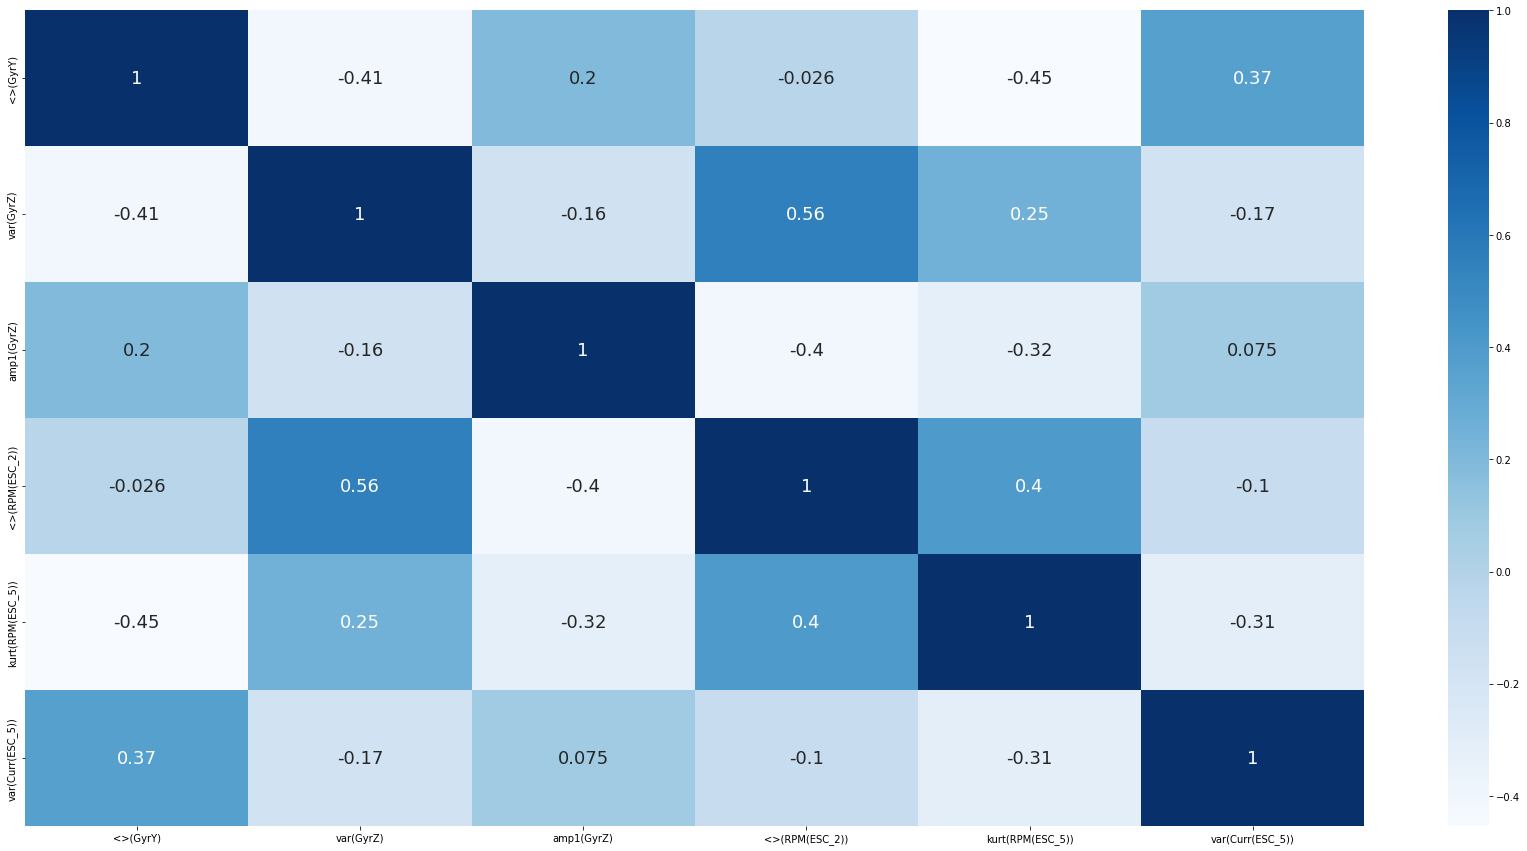

In [20]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [21]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1298, 6)
(325, 6)
(1298, 1)
(325, 1)


In [22]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

Cross-Validation: [0.65769231 0.70384615 0.71923077 0.67181467 0.69498069]
Accuracy: 0.7 	 ---> LogisticRegression 
Test: 0    1
Name: Guasto_test, dtype: int64


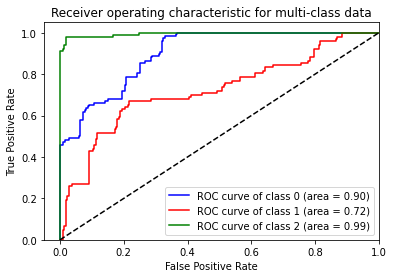

----------------------------------------------------
Cross-Validation: [0.62692308 0.59230769 0.63846154 0.5984556  0.64864865]
Accuracy: 0.65 	 ---> SVC 
Test: 0    1
Name: Guasto_test, dtype: int64


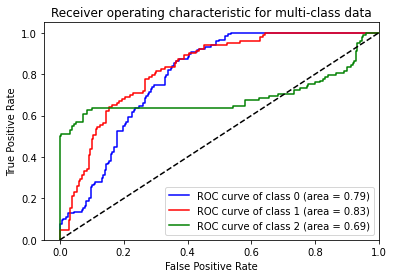

----------------------------------------------------
Cross-Validation: [0.33461538 0.33846154 0.33846154 0.43243243 0.40926641]
Accuracy: 0.32 	 ---> MLPClassifier 
Test: 2    1
Name: Guasto_test, dtype: int64


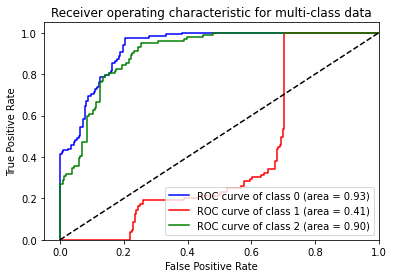

----------------------------------------------------
Cross-Validation: [0.33461538 0.33846154 0.33461538 0.33590734 0.33976834]
Accuracy: 0.32 	 ---> SGDClassifier 
Test: 2    1
Name: Guasto_test, dtype: int64


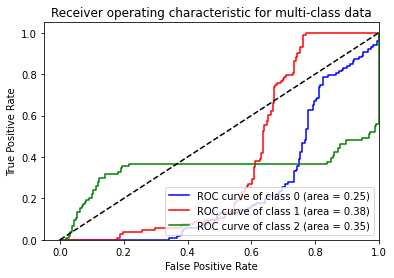

----------------------------------------------------


In [23]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3

j=0
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    #fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)

    if j != 2:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)
    else:
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)

       

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

    print("----------------------------------------------------")

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### Matrici di confusione

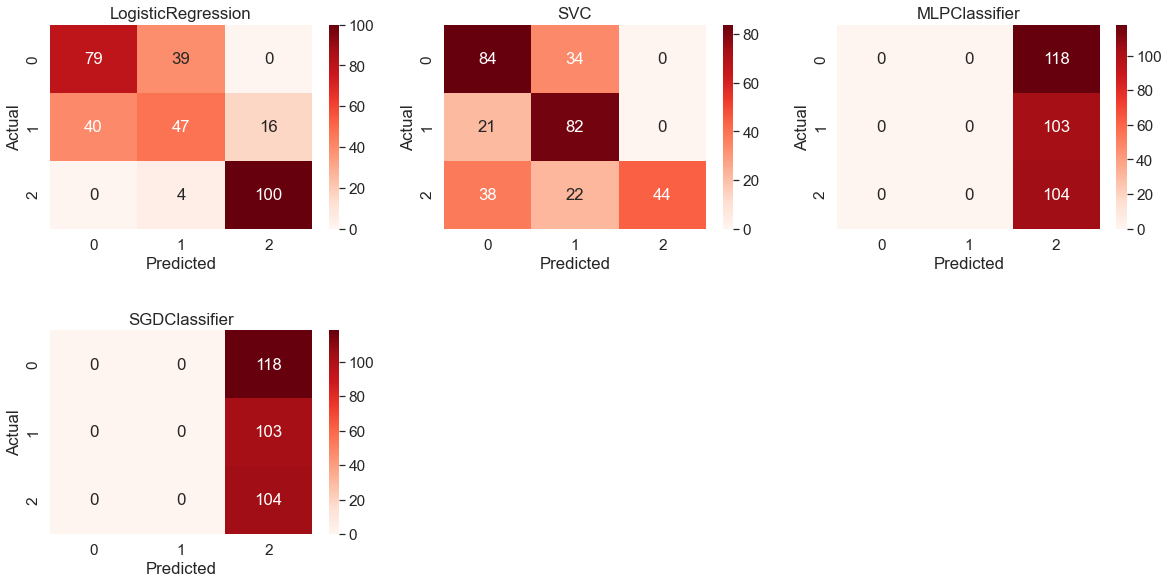

In [24]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Scores

Text(0.5, 1.0, 'Cross validation scores')

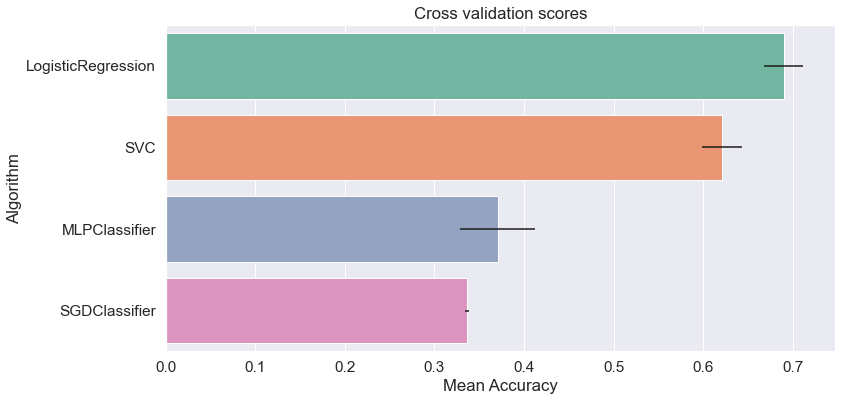

In [25]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [26]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       118
           1       0.52      0.46      0.49       103
           2       0.86      0.96      0.91       104

    accuracy                           0.70       325
   macro avg       0.68      0.70      0.69       325
weighted avg       0.68      0.70      0.69       325

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.71      0.64       118
           1       0.59      0.80      0.68       103
           2       1.00      0.42      0.59       104

    accuracy                           0.65       325
   macro avg       0.73      0.64      0.64       325
weighted avg       0.72      0.65      0.64       325

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       118
           1       0.00